In [42]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
import scipy.stats as stats

In [43]:
low_multi = 1.5
high_multi = 3.0
csv = 'lemonade.csv'
df = pd.read_csv(csv)
df

# df = df.groupby("Day")
# sales_by_day = df.describe().Sales
# sales_by_day['IQR'] = sales_by_day['75%']-sales_by_day['25%']
# sales_by_day['LUB'] = (low_multi  * sales_by_day.IQR) + sales_by_day['75%']
# sales_by_day['HUB'] = (high_multi  * sales_by_day.IQR) + sales_by_day['75%']
# sales_by_day


,Date,Day,Temperature,Rainfall,Flyers,Price,Sales
0,1/1/17,Sunday,27.0,2.00,15,0.5,10
1,1/2/17,Monday,28.9,1.33,15,0.5,13
2,1/3/17,Tuesday,34.5,1.33,27,0.5,15
3,1/4/17,Wednesday,44.1,1.05,28,0.5,17
4,1/5/17,Thursday,42.4,1.00,33,0.5,18
5,1/6/17,Friday,25.3,1.54,23,0.5,11
6,1/7/17,Saturday,32.9,1.54,19,0.5,13
7,1/8/17,Sunday,37.5,1.18,28,0.5,15
8,1/9/17,Monday,38.1,1.18,20,0.5,17
9,1/10/17,Tuesday,43.4,1.05,33,0.5,18


In [73]:
df
columns =['Flyers']
low_multiplier = 1.5
high_multiplier = 3.0
def outliers_iqr(low_multiplier, high_multiplier, columns):
    for col in columns:
        q75, q25 = np.percentile(df[col], [75,25])
        lub = low_multiplier*stats.iqr(df[col]) + q75
        llb = q25 - low_multiplier*stats.iqr(df[col])
        hub = high_multiplier*stats.iqr(df[col]) + q75
        hlb = q25 - high_multiplier*stats.iqr(df[col])
        dflub = df[df[col] > lub]
        dfllb = df[df[col] < llb]
        dfhub = df[df[col] > hub]
        dfhlb = df[df[col] < hlb]
    return dflub, dfllb, dfhub, dfhlb

In [74]:
outliers_iqr(low_multiplier, high_multiplier, columns)

(        Date     Day  Temperature  Rainfall  Flyers  Price  Sales
 166  6/16/17  Friday         99.3      0.47      77    0.5     41
 194  7/14/17  Friday         92.0      0.50      80    0.5     40,
          Date      Day  Temperature  Rainfall  Flyers  Price  Sales
 324  11/21/17  Tuesday         47.0      0.95     -38    0.5     20,
 Empty DataFrame
 Columns: [Date, Day, Temperature, Rainfall, Flyers, Price, Sales]
 Index: [],
          Date      Day  Temperature  Rainfall  Flyers  Price  Sales
 324  11/21/17  Tuesday         47.0      0.95     -38    0.5     20)

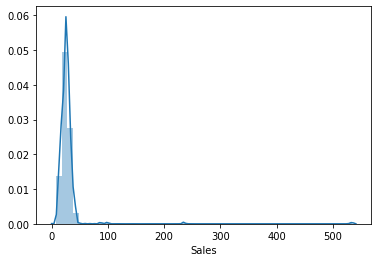

In [52]:
sns.distplot(df.Sales)

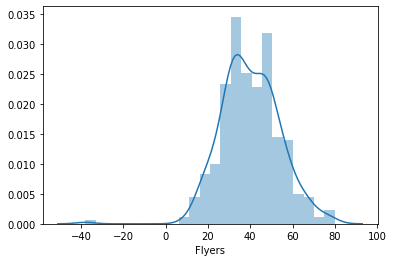

In [54]:
sns.distplot(df.Flyers)

In [66]:
x = df.Sales

# Calculate the z-score 
zscores = pd.Series((x - x.mean()) / x.std())
# zscores
# Finds all of the observations within two standard deviations
x[zscores.abs() < 1]

# Finds all of the observations within three standard deviations
x[zscores.abs() > 2]

183    235
184    534
185     99
Name: Sales, dtype: int64